In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)
#Import pandas and numpy data packages to perform calculations.
#Import plotlib package to graph.
#define plt to plot diagrams and the sizes of diagram 

In [2]:
heroes = pd.read_csv("superheroData.csv", parse_dates = ["FIRST_YEAR"])  
#Importing superheroData from csv and defined it as heroes 

In [3]:
heroes.head(0) #Display the first row from dataset. Can be used to test if the data imported correctly. 

,UNIVERSE,page_id,name,urlslug,ID,ALIGN,IS_AVENGER,AVENGER_STATUS,AVENGER_YEAR,EYES,HAIR,SEX,SEXUALITY,ALIVE,APPEARANCES,FIRST_MONTH,FIRST_YEAR,DECEASED,RESURRECTED


In [4]:
heroes_re = heroes.drop(heroes[heroes.RESURRECTED == "ND"].index)
heroes_yes = heroes_re.drop(heroes_re[heroes_re.RESURRECTED == "NO"].index)
heroes_no = heroes_re.drop(heroes_re[heroes_re.RESURRECTED == "YES"].index)
heroes_appear = heroes_re.drop(heroes_re[heroes_re.APPEARANCES == "ND"].index)
heroes_sex = heroes_re.drop(heroes_re[heroes_re.SEX == "ND"].index)
heroes_noND = heroes_re.drop(heroes_re[heroes_re.FIRST_YEAR == "ND"].index) 
heroes_noNaN = heroes_noND.drop(heroes_noND[heroes_noND.FIRST_YEAR == "NaN"].index)
heroes_ALND = heroes_re.drop(heroes_re[heroes_re.ALIGN == "ND"].index) 
#Using drop functions to elimiate all "ND", "NaN" data entries. 

<h1 align="center">
Exploring the Characteristics of Resurrected Superheroes. 
</h1>

Growing up with manga and anime, I was and still am very unfamiliar with American comics and it's superheroes characters. Most of the time, I cannot bring myself to take an interest in them. That is until I came to know of Deadpool. As product of scientific study that attempts to turn humans into mutants, Deadpool was like the baby that somehow miraculously survived an abortion. Scarred face and with an array of mental issues. It is no wonder that Wade Wilson constantly got himself into all sorts of troubles, but his super healing powers has always pulled him through. 
<br>
<br>
I was simply fascinated by the very idea of an immortal but mortal character. Fascinated by the levels of fearlessness and defiance toward human common fate, death. It occurred to be that perhaps Immortal or Resurrected superheroes characters are the culture of North America comics and cartoons. Comparatively speaking, East Asian culture features amazing characters but once they die, fans can count on them not coming back. I cried when I found out that my favorite hero, L from Death Note, has sacrificed himself. Because I knew he wasn't coming back.

<img src="https://i.pinimg.com/600x315/b8/5b/4d/b85b4d6155c4ed2b27834ad730dc2748.jpg" alt="Death Note character L" title="L by Stetchy" style="width:600px;" align="center"/>
<img src="https://i2.wp.com/www.zoom-comics.com/wp-content/uploads/sites/36/2011/12/captain-america-being-revived.jpg?fit=1200%2C675&ssl=1" alt="Captain America Revived?" title="Captain America revival timeline" style="width:600px" align="center"/>  

<h6 align="center" style="color:teal"> An example of East Asian character "L" vs North America character, "Captain America". </h6>


You can count on action-packed North American comics to always have super heroes diving head first into fire, running through bullet-rains, risking themselves for the safety of humankinds. Such reckless actions, it is no wonder that superheroes are bound to sustain injuries, or worse, death. Luckily, both Marvel and DC writers have done their fair share in bringing back beloved characters to life. Despite many characters being resurrected, it is not a privilege granted to just anyone. So what do resurrected characters have in common?

In order to explore the culture of comic characters resurrection, let us explore the superheroes dataset compiled by Walt Hickey, who works for 538 online blog. 538 specializes in online data analysis and in 2010 it became a licensed feature of The New York Times online. Walt Hickey originally compiled this data for his own investigation by pulling data from Wikies articles. Therefore, this data was contributed, and fact checked by fans, for fans. 
Upon reviewing the data, I found that there are many invalid entries such as ND and NaN. I have decided to filter as much of these entries out as possible in-order to prevent said data, which I thought was not meaningful, to affect the end result of analysis.
 

Before jumping into data analysis part of this project, I wanted to acknowledge my own biases and suspicions. I suspect that there would be more male character resurrections compared to female. My suspicion comes from my existing knowledge that there are more male superheroes than female. In addition, I think there would be more characters with secret identities who are resurrected. My belief is a product of my personal preference that I would be curious to know more about a mysterious character, and therefore in the case of their death, I would more likely to be disappointed and demand their revival. By acknowledging these biases and theories, moving forward I would be more aware to **not** deliberately select information that support my argument. I would make every efforts to be fair, neutral and inferring data as truthful as possible.  

I want to make this an exploratory project, so it was important for me to be to remain neutral throughout the process. I was not trying to create something specific in mind but rather looking for the answers to my questions and hopefully find a common thread among them. I experimented by coming up with as many meaningful questions as I could. Then I set out to look at the data to find answers to these questions. Unfortunately, some of my corresponding data was not able to offer me a clear view and so some of my questions remained unanswered. Those questions have been removed from my analysis. I believe that the remaining queries would help me paint a better picture. 
<br>
<br>
I tried to spend more of my time on creating baby data sets, so that my functions can easily access the data I need and hopefully eliminate some potential troubles down the road. Of course, my code did not work properly on the first try therefore, the majority of my time was spent on testing and debugging. After I received the data for my questions it was a matter of inferring results and connecting them to find meaningful messages. 
<br>
<br>
To me this exploratory approach was not something that I'm normally comfortable with. I'm sure many would agree that as humans, we often view the world through our personal windows ridden with biases. It was my intention to not make judgement but be aware of them while choosing to explore with my data to find the real answers. Though I was not in my comfort zone. I had a lot of fun trying out this new approach.

To start off, I explored the relationship between appearances and resurrection. I wanted to see if there is a correlation between these two elements. Because I'm comparing Resurrected to Non-Resurrected characters on the scale of appearances or popularity. I think it would be appropriate to use a simple bar chart.  

<h3 align="center">
Question:1: How is the popularity between resurrected and non-resurrected characters ? 
</h3>

In [5]:
heroes_appear["APPEARANCES"] = heroes_appear["APPEARANCES"].apply(pd.to_numeric)
appear_pivot = pd.pivot_table(heroes_appear, values = ["APPEARANCES"], index = ["RESURRECTED"], aggfunc = np.mean)
#Change column "APPEARANCES" to have numeric values. 
#print(appear_pivot).to check the results. 
#I had made a pivot table in excel earlier. I expect to see Appearances to be 304 for No and 731 for Yes


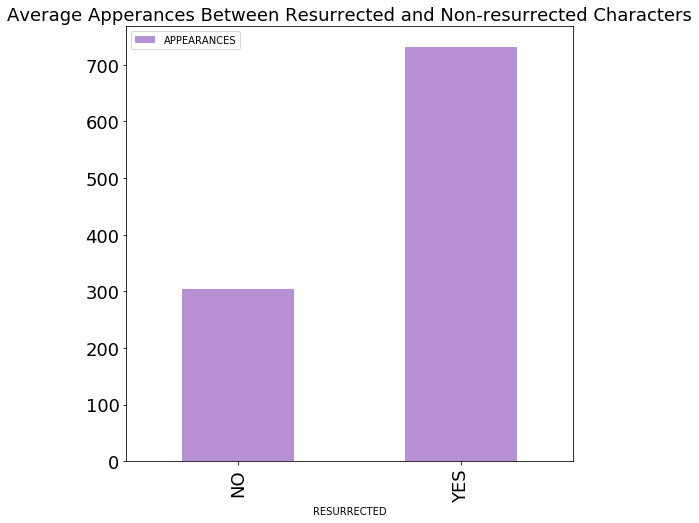

In [6]:
select_c01 = ['#b790d4']
appear_pivot.plot(kind="bar", color = select_c01, subplots=True, fontsize=18)
plt.title("Average Apperances Between Resurrected and Non-resurrected Characters", fontsize = 18)
plt.show()
#Plot a bar chart based on the data from pivot table.

*The above graph clearly shows that among characters that were resurrected they are, on average, have more than twice the number of apperances as those who weren't. Perhaps superheroes who are more popular with readers are more likely to being brought back to life.
<br>
Among characters who were revived, Spiderman is an extremely popular character. Not only does his existence extend beyond comics. He is a beloved character that is featured in many movies, children shows and merchandises as well.*

<img src="Images/Spiderman.jpg" alt="Spider man is most popular" title="Spider man Revival" style="width:700px;" align="center"/>
<br>
<h6 align="center" style="color:teal"> Among Resurrected characters, Sprider man has the highest number of appearances, 4333 and counting. </h6> 

<h3 align="center">
Question:2: How is the gender distribution among ressurrected characters ? 
</h3>

I wanted to evaluate the gender distribution of resurrected characters. After I created a baby data set to only include characters that were resurrected. I was very surprised to see that there are only male and female characters that were resurrected. None of the characters reported to be outside of the binary gender scale was revived. Because we are looking that the percentage of characters from each gender, I thought an appropriate choice of graph would be the pie chart. 

In [7]:
revived_gender = pd.crosstab(columns = heroes_sex["RESURRECTED"] == "YES", index = heroes_sex["SEX"])
revived_gender.columns= ["Not Ressurrected", "Ressurrected"]
revived_gender.sort_values(by="Ressurrected", ascending=False)
#Using crosstab to compare two different factors: resurrected characters and their gengders 

,Not Ressurrected,Ressurrected
SEX,,
Male Characters,17,30
Female Characters,6,16


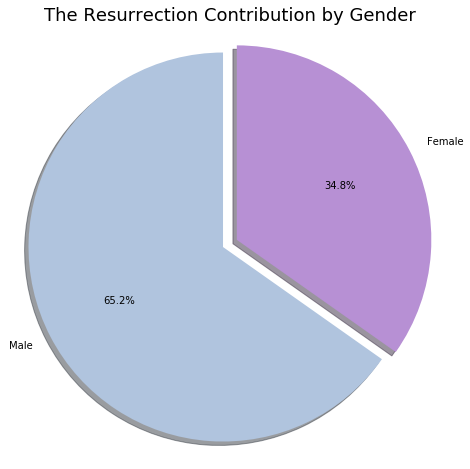

In [8]:
fig1, gen_distribution = plt.subplots()
labels = [ 'Male', 'Female']
sizes = [30, 16]
explode = (0, 0.08)
select_cl0 = ['#B0C4DE', '#b790d4']
gen_distribution.pie(sizes, explode=explode, labels=labels, colors=select_cl0, autopct='%1.1f%%', shadow=True, startangle=90 )
plt.title('The Resurrection Contribution by Gender', fontsize = 18)
plt.axis('equal')
plt.show()
#Plot a pie chart using subplot
#Define labels, sizes of the pieces, colors. 
#Explode the "Female portion" with intention to examine said data later. 
#Adjust axis 'equal' so the pie chart is perfectly circular. 

_Looking at the graph "Resurrection Contribution by Gender" we can see that Male Characters contribute 65% of the ressurections, almost double that of Female Characters. Other genders has no representation among revived characters at all. This disparity in distribution is concerning for me because I'm a big supporter of equality for the sexes, and for that to happen we need to have equal representations across different industries as well._  

<img src="Images/ScarletWitch.jpg" alt="ScarletWitch, female revival" title="ScarletWitch Revival" style="width:500px;"/>
<br>
<h6 align="center" style="color:teal"> Compared to Spiderman, Scarlet Witch is the revived superhero that has the highest number of appearances among female characters,  1214 and counting. Compared to Spiderman's data, she seems to pale in comparision. </h6>

This pie chart did a great job in show casing the inequality between gender representation. However, it is only a snapshot. I order to investigate the gender disparity between revived characters, I think we should take a look at the how this representatioin has changed over time. To view changes over time and spot trends of data. I think a line chart would be most appropriate to visualize our data. 

<h3 align="center">
Question:3: How do ressurection by gender changes over time ?
</h3>

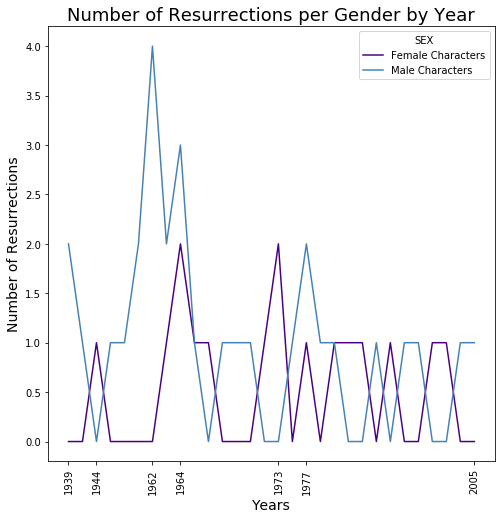

In [9]:
heroes_YES = heroes_re.drop(heroes_re[heroes_re.RESURRECTED == "NO"].index)
revive_sex = pd.crosstab(heroes_YES["FIRST_YEAR"], heroes_YES["SEX"])
select_cl2 = ["#4B0082","#4682B4"]
revive_sex.plot(color = select_cl2 )
plt.title("Number of Resurrections per Gender by Year", fontsize = 18 )
plt.xlabel("Years", fontsize = 14)
plt.xticks([0, 2, 6, 8,15, 17, 29], ["1939", "1944", "1962", "1964","1973", "1977", "2005"], rotation='vertical')
plt.ylabel("Number of Resurrections", fontsize = 14)
plt.show()
#clean and print(heroes_YES) Display the dataset, to check if the set of data looks good. 
#Use a crosstab to compare between resurrection over the years between male and female. 
#Use the information from crosstab to plot a line graph. 
#Define titles, labels, colors and decide to graph important times usign xticks.

_The above graph shows us a clear trend of Male Characters Resurrection on the decline during 1939-1944, which is during WWII. All the while Female Characters Resurrection was rising. Right after WWII, however, we can see a sharp decrease of record of Female Resurrection and Male Resurrection sky rocketed._

_One possible reason for the rise in female character revival could lies in the readership. As men were drafted during the war, female readership rose exponentially. Therefore, more attention were directed at pleasing the new majority. Base on that, we can also reason that perhaps after WWII, as the men came back from the battle field, comics creators shifted their attention back to male readers, in addition, there was also a need to boost soldiers morals by creating more ressurections, especially of Male Characters hence male characters revival rate really took off._ 

While I was running my data through exploratory questions. One result really stood out to me was the distribution of characters identities. My original assumption was Characters with Secret Identities would have a higher chance of being resurrected because their identity would make them more attractive to readers. However, I was happy to be proven wrong. Among male and female genders there is also a division of preference for character identities as well. Because I want to show case character identity distribution of female vs male characters, I thought a stacked bar chart would be most appropriate. 

<h3 align="center">
Question:4: Explore the Identities of characters that were ressurected? 
</h3>

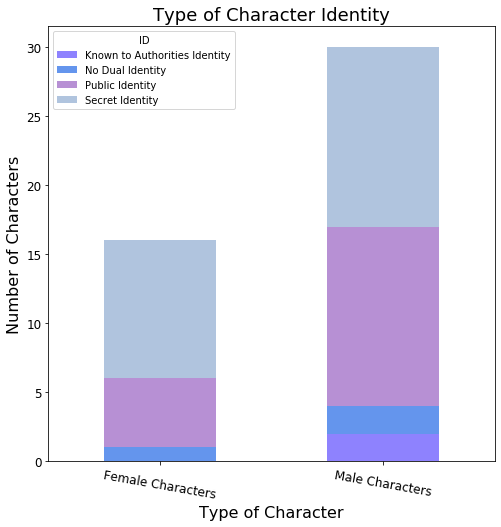

In [10]:
revive_id = pd.crosstab(heroes_YES["SEX"], heroes_YES["ID"])
select_cl2 = ['#8e82fe','#6495ED', '#b790d4', "#B0C4DE"]
revive_id.plot(kind = 'bar', color = select_cl2, stacked = True)
plt.title("Type of Character Identity", fontsize = 18)
plt.xticks(rotation=-10, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Type of Character", fontsize = 16)
plt.ylabel("Number of Characters", fontsize = 16)
plt.show()

#Use a crosstab to compare between resurrections identity between male and female.
#Define titles, labels, and colors. 
#Plot the stacked barchart.
#Use ticks to label the bars.

_Let's take a look at the break down of Character Identities of Sesurrected Characters between genders. The majority of Female characters have Secret Identity while Male Characters seemingly equal distribution of Public and Secret Identity. It seems that Female Characters are more likely to be revived if they have public identity while with male characters it matters less wheter they have public or secret identity._  

### My thoughts ?
As I mentioned previously, I wanted to take the exploratory approach to this project. My findings is far from covering all aspects that affect a character's revival. However, I am happy to have discovered some information that points to certain characteristics among resurrected characters.<br> 
Superheroes would have a higher chance of being revived if they are more popular among readers and/or are male. Among male characters it mattered little if our heroes have a public or secret identity. However, female heroes are prefered if they have secret identity. <br>
One thing to note regarding the data set was that it was made by fans and for fans. Therefore, information in this dataset has not been confirmed by comic books writers. Whose intentions might differ from information perceived by readers.<br>
In the future I would love to run similar questions though a data set compiled from information provided by comic book writers themselves. My assumption is that there would be little difference in the results. However, I would love to have the chance to be proven wrong.


__Acknowledgement:__
<br>
Media sources:
http://marvel.wikia.com/wiki/What_If%3F_Vol_1_44 
<br>
https://www.deviantart.com/stetchi/art/Death-Note-L-59314139
<br>
https://www.youtube.com/watch?v=WjMDu91mVCQ
<br>
http://marvel.com/universe/Scarlet_Witch_(Wanda_Maximoff)
<br>
Data Visualization resources: 
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
<br>
https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot
<br>
https://stackoverflow.com/questions/22245949/adding-a-custom-tick-and-label
<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.pie.html
<br>
https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
<br>
https://stackoverflow.com/questions/34844711/convert-entire-pandas-dataframe-to-integers-in-pandas-0-17-0/34844867
<br>
Thank you Wendy for the original skeleton code. <br>
Thank you Anthony for all your help and guidance throughout this course. 